Data source: https://www.kaggle.com/robikscube/hourly-energy-consumption

Reference paper: https://www.researchgate.net/publication/256089416_Modelling_Using_Polynomial_Regression

Note: first add the AEP_Hourly.csv file in the directory

In [ ]:
import csv
from matplotlib import pyplot as plt
import numpy as np

## **Function to read data from csv file**

In [ ]:
def load_data():

    array = []

    with open('AEP_hourly_data.csv') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            array.append(row)
    

    array = array[24:]
    array = [[i[0][-8:], float(i[1])] for i in array]

    array = [[1 + 4 * int(i[0][:2]), i[1]] for i in array]
    array1 = []
    element = []

    for i in array:
      element.append(i)
      if i[0] == 93:
          array1.append(element)
          element = []
    
    output_array = []

    for i in array1:
      if len(i) == 24: # Remove days which do not have the data of all days (31 such days exist)
        output_array.append(i)

    return output_array

In [ ]:
array = load_data()
print(array)

[[[1, 12892.0], [5, 14097.0], [9, 13667.0], [13, 13451.0], [17, 13379.0], [21, 13506.0], [25, 14121.0], [29, 15066.0], [33, 15771.0], [37, 16047.0], [41, 16245.0], [45, 16377.0], [49, 16138.0], [53, 15886.0], [57, 15503.0], [61, 15206.0], [65, 15049.0], [69, 15161.0], [73, 16085.0], [77, 16508.0], [81, 16306.0], [85, 16223.0], [89, 15931.0], [93, 15207.0]], [[1, 14316.0], [5, 15223.0], [9, 14731.0], [13, 14503.0], [17, 14432.0], [21, 14531.0], [25, 15087.0], [29, 16018.0], [33, 16968.0], [37, 17149.0], [41, 17261.0], [45, 17194.0], [49, 17011.0], [53, 16749.0], [57, 16546.0], [61, 16403.0], [65, 16161.0], [69, 16380.0], [73, 17330.0], [77, 17738.0], [81, 17468.0], [85, 17093.0], [89, 16736.0], [93, 15984.0]], [[1, 14900.0], [5, 17580.0], [9, 17158.0], [13, 17002.0], [17, 16923.0], [21, 17191.0], [25, 17908.0], [29, 18944.0], [33, 19752.0], [37, 19882.0], [41, 19544.0], [45, 19309.0], [49, 18756.0], [53, 18201.0], [57, 17666.0], [61, 17203.0], [65, 16935.0], [69, 17207.0], [73, 18349.0]

## **Formatting the data**

In [ ]:
# Total number of days
print(len(array))

5022


#### **Separate data day-wise**

In [ ]:
x, y = [], []
for day in array:
  element_x = []
  element_y = []
  for block in day:
    element_x.append(block[0])
    element_y.append(block[1])
  x.append(element_x)
  y.append(element_y)

In [ ]:
print(x)
print(y)

[[1, 5, 9, 13, 17, 21, 25, 29, 33, 37, 41, 45, 49, 53, 57, 61, 65, 69, 73, 77, 81, 85, 89, 93], [1, 5, 9, 13, 17, 21, 25, 29, 33, 37, 41, 45, 49, 53, 57, 61, 65, 69, 73, 77, 81, 85, 89, 93], [1, 5, 9, 13, 17, 21, 25, 29, 33, 37, 41, 45, 49, 53, 57, 61, 65, 69, 73, 77, 81, 85, 89, 93], [1, 5, 9, 13, 17, 21, 25, 29, 33, 37, 41, 45, 49, 53, 57, 61, 65, 69, 73, 77, 81, 85, 89, 93], [1, 5, 9, 13, 17, 21, 25, 29, 33, 37, 41, 45, 49, 53, 57, 61, 65, 69, 73, 77, 81, 85, 89, 93], [1, 5, 9, 13, 17, 21, 25, 29, 33, 37, 41, 45, 49, 53, 57, 61, 65, 69, 73, 77, 81, 85, 89, 93], [1, 5, 9, 13, 17, 21, 25, 29, 33, 37, 41, 45, 49, 53, 57, 61, 65, 69, 73, 77, 81, 85, 89, 93], [1, 5, 9, 13, 17, 21, 25, 29, 33, 37, 41, 45, 49, 53, 57, 61, 65, 69, 73, 77, 81, 85, 89, 93], [1, 5, 9, 13, 17, 21, 25, 29, 33, 37, 41, 45, 49, 53, 57, 61, 65, 69, 73, 77, 81, 85, 89, 93], [1, 5, 9, 13, 17, 21, 25, 29, 33, 37, 41, 45, 49, 53, 57, 61, 65, 69, 73, 77, 81, 85, 89, 93], [1, 5, 9, 13, 17, 21, 25, 29, 33, 37, 41, 45, 49,

In [ ]:
y = np.array(y)

In [ ]:
#y = np.amax(y)

#### **Scaling the data from 150 to 200**
(as the range of values are from 150MW to 200MW)

In [ ]:
y = 150 + (y / np.amax(y)) * 50

In [ ]:
y = y.tolist()

In [ ]:
y

[[175.08659272231952,
  177.4314068884997,
  176.59466822338976,
  176.17435298696245,
  176.03424790815333,
  176.28137769994163,
  177.4781085814361,
  179.31698774080562,
  180.68884997081145,
  181.22591943957968,
  181.61120840630474,
  181.86806771745475,
  181.4029966919634,
  180.91262891613155,
  180.16734773302198,
  179.58941428293443,
  179.28390737497568,
  179.50184860867873,
  181.29986378672893,
  182.12298112473243,
  181.729908542518,
  181.56839852111307,
  181.00019459038725,
  179.59136018680678],
 [177.85755983654408,
  179.62249464876436,
  178.66510994356878,
  178.22144386067328,
  178.08328468573652,
  178.27592916909904,
  179.35785172212493,
  181.16948822728156,
  183.01809690601283,
  183.37030550690795,
  183.58824674061103,
  183.45787118116365,
  183.10177077252382,
  182.59194395796848,
  182.19692547188168,
  181.9186612181358,
  181.44775248102744,
  181.8739054290718,
  183.72251410780308,
  184.51644288772135,
  183.99104884218718,
  183.2613348900

#### **Function to plot the data**

In [ ]:
def plotting_function(ind):
  global x, y
  plt.grid(True)
  plt.xlabel("Block Number")
  plt.ylabel("Actual Generation (AG)")
  plt.plot(x[ind], y[ind])
  plt.show()

## **Observing the Data**

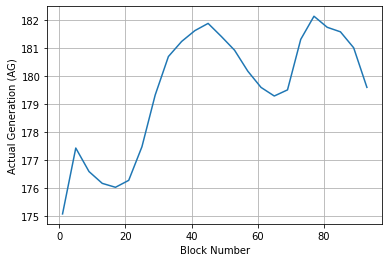

In [ ]:
plotting_function(0)

In [ ]:
plotting_function(1)

In [ ]:
plotting_function(2)

In [ ]:
plotting_function(3)

In [ ]:
plotting_function(4)

In [ ]:
plotting_function(5)

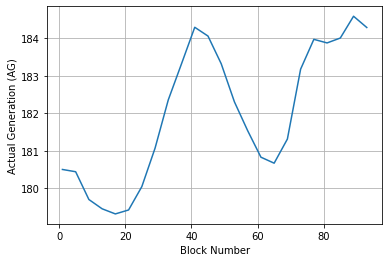

In [ ]:
plotting_function(6)

In [ ]:
plotting_function(7)

In [ ]:
plotting_function(8)

In [ ]:
plotting_function(9)

**Conclusions: The data has 3 peaks: around the 5th, 40th, and the 80th block. The data also resembles a polynomial function**

**Result: Polynomial regression to be used**

## **Polynomial Regression: Explanation**

## **Polynomial Regression**

In [ ]:
def polynomial_regression(X, Y, N):
  """Generalized function for polynomial regression of N degree
  X and Y are numpy.ndarray, N is the degree of the required polynomial function"""

  input_matrix = [] # Square matrix of order (N+1)
  k = 0
  for i in range(N+1):
    input_matrix.append([sum(X ** (i + j)) for j in range(N+1)])
    k += 1
  
  input_matrix = np.array(input_matrix)

  output_matrix = []
  for i in range(N+1):
    output_matrix.append([sum(Y * (X ** i))])
  
  output_matrix = np.array(output_matrix)

  parameter_matrix = np.matmul(np.linalg.inv(input_matrix), output_matrix)
  
  def regression_function(X_i):
    total = 0
    for i in range(len(parameter_matrix)):
      total += (X_i ** i) * parameter_matrix[i]

    return total

  return regression_function
  

## **Training the model**

#### Function to split the data into training and testing sets

In [ ]:
def train_test_split(arr, percent):
  """Splits an array into train and test set)"""
  L = len(arr) - 1
  last = int(L * percent / 100)

  return (arr[:last]), (arr[last:])

In [ ]:
x_train, x_test = train_test_split(x, 20)
y_train, y_test = train_test_split(y, 20)

#### Training the model

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train, y_train = x_train.flatten(), y_train.flatten()

### **Array to store functions for degree 0 to 9**: Using this we will be able to call our prediction function of degree n using the array's nth index element i.e. array[n]

In [ ]:
regression = [polynomial_regression(x_train, y_train, i) for i in range(10)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in long_scalars
  


In [ ]:
print(regression)

[<function polynomial_regression.<locals>.regression_function at 0x7f01be37def0>, <function polynomial_regression.<locals>.regression_function at 0x7f01be37d8c0>, <function polynomial_regression.<locals>.regression_function at 0x7f01be37d830>, <function polynomial_regression.<locals>.regression_function at 0x7f01be37dd40>, <function polynomial_regression.<locals>.regression_function at 0x7f01bdaa7560>, <function polynomial_regression.<locals>.regression_function at 0x7f01be37db00>, <function polynomial_regression.<locals>.regression_function at 0x7f01bdaa73b0>, <function polynomial_regression.<locals>.regression_function at 0x7f01bdaa7050>, <function polynomial_regression.<locals>.regression_function at 0x7f01bdaa7320>, <function polynomial_regression.<locals>.regression_function at 0x7f01bdaa7290>]


In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [ ]:
len(x_train)

24096

## **Prediction**

The model performs prediction for a certain day in the test dataset. The degree of the predicted polynomial function and the day can be conveniently changed by changing the value of these parameters

In [ ]:
def prediction(test_day, degree):
  print(x_test[test_day])
  plt.plot(x_test[test_day], regression[degree](x_test[test_day]))
  plt.plot(x_test[test_day], y_test[test_day])
  plt.grid(True)
  plt.legend(["Predicted Value", " Actual Value"])
  plt.xlabel("Block Number")
  plt.ylabel("Actual Generation (MW)")
  plt.show()

[ 1  5  9 13 17 21 25 29 33 37 41 45 49 53 57 61 65 69 73 77 81 85 89 93]


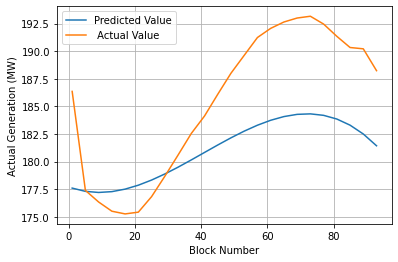

In [ ]:
prediction(0, 4) # Prediction using a 3-degree polynomial for day 8

In [ ]:
len(x_test)

4018

5053
[[[1, 12892.0], [5, 14097.0], [9, 13667.0], [13, 13451.0], [17, 13379.0], [21, 13506.0], [25, 14121.0], [29, 15066.0], [33, 15771.0], [37, 16047.0], [41, 16245.0], [45, 16377.0], [49, 16138.0], [53, 15886.0], [57, 15503.0], [61, 15206.0], [65, 15049.0], [69, 15161.0], [73, 16085.0], [77, 16508.0], [81, 16306.0], [85, 16223.0], [89, 15931.0], [93, 15207.0]], [[1, 14316.0], [5, 15223.0], [9, 14731.0], [13, 14503.0], [17, 14432.0], [21, 14531.0], [25, 15087.0], [29, 16018.0], [33, 16968.0], [37, 17149.0], [41, 17261.0], [45, 17194.0], [49, 17011.0], [53, 16749.0], [57, 16546.0], [61, 16403.0], [65, 16161.0], [69, 16380.0], [73, 17330.0], [77, 17738.0], [81, 17468.0], [85, 17093.0], [89, 16736.0], [93, 15984.0]], [[1, 14900.0], [5, 17580.0], [9, 17158.0], [13, 17002.0], [17, 16923.0], [21, 17191.0], [25, 17908.0], [29, 18944.0], [33, 19752.0], [37, 19882.0], [41, 19544.0], [45, 19309.0], [49, 18756.0], [53, 18201.0], [57, 17666.0], [61, 17203.0], [65, 16935.0], [69, 17207.0], [73, 183

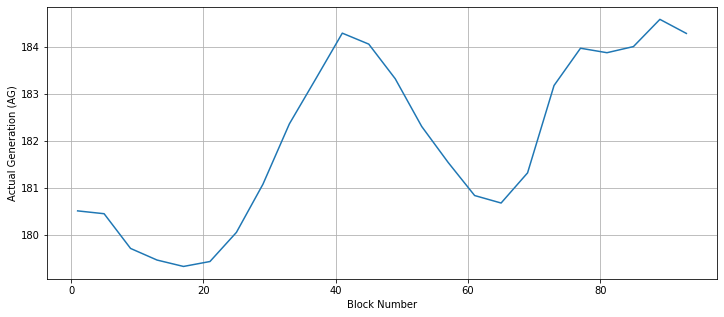

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:73: RuntimeWarning: overflow encountered in long_scalars


[177.59978236 177.30424698 177.20475222 177.27930507 177.50591037
 177.8625708  178.32728687 178.87805692 179.49287714 180.14974156
 180.82664201 181.50156821 182.15250768 182.75744579 183.29436574
 183.74124857 184.07607316 184.27681623 184.32145231 184.18795381
 183.85429094 183.29843176 182.49834217 181.4319859 ]


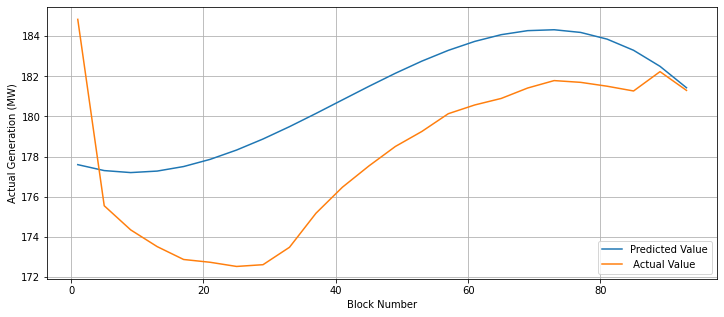

In [ ]:
import csv
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

def load_data():
  array = []
  with open('AEP_hourly_data.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
      array.append(row)
  

  array = array[24:]
  array = [[i[0][-8:], float(i[1])] for i in array]

  array = [[1 + 4 * int(i[0][:2]), i[1]] for i in array]
  array1 = []
  element = []

  for i in array:
    element.append(i)
    #print(1)
    if i[0] == 93:
      #print(1)
      array1.append(element)
      element = []
  
  output_array = []
  print(len(array1))
  for i in array1:
    if len(i) == 24: # Remove days which do not have the data of all days (31 such days exist)
      output_array.append(i)

  return output_array

array = load_data()
print(array)

x, y = [], []
for day in array:
  element_x = []
  element_y = []
  for block in day:
    element_x.append(block[0])
    element_y.append(block[1])
  x.append(element_x)
  y.append(element_y)

y = np.array(y)
y = 150 + (y / np.amax(y)) * 50
y = y.tolist()
def plotting_function(ind):
  global x, y
  fig = plt.figure(figsize=(12, 5))
  plt.grid(True)
  plt.xlabel("Block Number")
  plt.ylabel("Actual Generation (AG)")
  plt.plot(x[ind], y[ind])
  plt.show()
  #plt.pyplot(fig)

plotting_function(6)

def polynomial_regression(X, Y, N):
  """Generalized function for polynomial regression of N degree
  X and Y are numpy.ndarray, N is the degree of the required polynomial function"""

  input_matrix = [] # Square matrix of order (N+1)
  k = 0
  for i in range(N+1):
    input_matrix.append([sum(X ** (i + j)) for j in range(N+1)])
    k += 1
  
  input_matrix = np.array(input_matrix)

  output_matrix = []
  for i in range(N+1):
    output_matrix.append([sum(Y * (X ** i))])
  
  output_matrix = np.array(output_matrix)

  parameter_matrix = np.matmul(np.linalg.inv(input_matrix), output_matrix)
  
  def regression_function(X_i):
    total = 0
    for i in range(len(parameter_matrix)):
      total += (X_i ** i) * parameter_matrix[i]

    return total

  return regression_function

def train_test_split(arr, percent):
  """Splits an array into train and test set)"""
  L = len(arr) - 1
  last = int(L * percent / 100)
  return (arr[:last]), (arr[last:])

x_train, x_test = train_test_split(x, 20)
y_train, y_test = train_test_split(y, 20)
x_train, y_train = np.array(x_train), np.array(y_train)
x_train, y_train = x_train.flatten(), y_train.flatten()

regression = [polynomial_regression(x_train, y_train, i) for i in range(10)]

x_test, y_test = np.array(x_test), np.array(y_test)

def prediction(test_day, degree):
  print(regression[degree](x_test[test_day]))
  fig = plt.figure(figsize=(12, 5))
  bk= regression[degree](x_test[test_day])
  #bk = 150 + (bk / np.amax(bk)) * 50
  plt.plot(x_test[test_day], bk)
  plt.plot(x_test[test_day], y_test[test_day])
  plt.grid(True)
  plt.legend(["Predicted Value", " Actual Value"])
  plt.xlabel("Block Number")
  plt.ylabel("Actual Generation (MW)")
  plt.show()
  #plt.pyplot(fig)

[177.59978236 177.30424698 177.20475222 177.27930507 177.50591037
 177.8625708  178.32728687 178.87805692 179.49287714 180.14974156
 180.82664201 181.50156821 182.15250768 182.75744579 183.29436574
 183.74124857 184.07607316 184.27681623 184.32145231 184.18795381
 183.85429094 183.29843176 182.49834217 181.4319859 ]


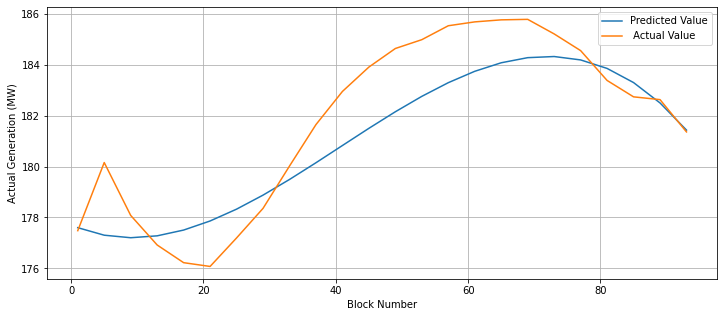

In [ ]:
prediction(3, 4)

In [ ]:
print(regression[4](x_test[0]))

[177.59978236 177.30424698 177.20475222 177.27930507 177.50591037
 177.8625708  178.32728687 178.87805692 179.49287714 180.14974156
 180.82664201 181.50156821 182.15250768 182.75744579 183.29436574
 183.74124857 184.07607316 184.27681623 184.32145231 184.18795381
 183.85429094 183.29843176 182.49834217 181.4319859 ]
